# IMPORT LIBRARIES

In [1]:
# import used libraries
import pandas as pd                        # pandas for data analysis
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt            # matplotlib for data visualisation
from scipy import stats  
import numpy as np

# pip install gensim
# pip install empath
# pip install wordcloud
# pip install matplotlib-venn
# pip install nltk



***
# Loading data 

In [2]:
DIR = "data/"

#read
ENT_TIMESERIES_PATH = DIR + "ent_timeseries_en.tsv.zip"
ENT_CHANNELS_PATH   = DIR + "ent_channels_en.tsv.zip"
ENT_METADATA_PATH   = DIR + "ent_metadata_en.tsv.zip"

In [4]:
# entertainment timeseries
ent_timeseries = pd.read_csv(ENT_TIMESERIES_PATH)
ent_timeseries.datetime = pd.to_datetime(ent_timeseries.datetime)

# entertainment channels
ent_channels   = pd.read_csv(ENT_CHANNELS_PATH)
ent_channels.join_date = pd.to_datetime(ent_channels.join_date)

# entertainment metadata
ent_metadata   = pd.read_csv(ENT_METADATA_PATH)
ent_metadata.upload_date = pd.to_datetime(ent_metadata.upload_date)

FileNotFoundError: [Errno 2] No such file or directory: 'data/ent_timeseries_en.tsv.zip'

***
# Display dataframes

In [4]:
#display timeseries
ent_timeseries.head()
#length of timeseries
len(ent_timeseries)

NameError: name 'ent_timeseries' is not defined

In [7]:
#sort channels by evolution score
ent_channels.sort_values(by=['evo_score'], inplace=True, ascending=False)
#display channels
ent_channels.head()
#number of channels
len(ent_channels)

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights,initial_subs,evo_score,has_buzzed
0,Entertainment,2013-05-03,UCMxtWuqP6Ktk1tsSZSstaug,Haryanvi Maina,8830000,1619,666.0,2.0870,9043.500000,0.043476,1
1,Entertainment,2006-02-27,UCDfk8ogO6QGeJAYCY0QDzKw,Stephen Sharer,7230000,549,867.0,2.0870,8843.000000,0.039752,1
2,Entertainment,2015-11-24,UCAgx4HcQIYn9lM0rhtIuH9w,HZHtube Kids Fun,6570000,358,914.0,2.0870,6100.000000,0.040441,1
3,Entertainment,2015-06-13,UCQcf-d098cNGGl3bPGGjHBg,OLIE THE CUB,6820000,778,941.0,2.0870,5181.000000,0.042452,1
4,Entertainment,2017-04-26,UC977n5nXRn8MDuGQjwxkOLw,PC Bob and Mr Bean: ...,6730000,3377,943.0,2.0870,6468.000000,0.051014,1
...,...,...,...,...,...,...,...,...,...,...,...
1253,Entertainment,2010-06-04,UCswGzcZ3DcBXN5Pc3J7d9Mg,BlaakowDancer,10200,65,977320.0,53.1435,7284.625000,0.001790,0
1254,Entertainment,2011-03-01,UChN6SlSBv21jbp6n1XRSbJA,thesongadayproject,10100,2624,977759.0,53.1435,9963.000000,0.000297,0
1255,Entertainment,2012-12-17,UCOioqCYGI_pOUWGGD1cMPCQ,Taylor Swift Brasil,10100,257,978347.0,53.1435,5840.744186,0.002987,0
1256,Entertainment,2013-12-27,UCQV1dyQqE8dtgWU6U_Rg0WQ,CrazySuperGamer,10300,38,978503.0,53.1435,9130.250000,0.000869,0


In [8]:
#display metadata
ent_metadata.head()
#number of videos
len(ent_metadata)

,channel,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
0,UCztk4LFUIk4Ao4TCvpdnDsg,65.0,FQ_r9pGTLAs,415,3236.0,NaN,Bewafai | बेवफाई | بے وفائی,2019-09-20,45879.0
1,UCztk4LFUIk4Ao4TCvpdnDsg,43.0,5My0Au_MK18,190,3973.0,"خاموشی,#Khamoshi #Urdu #Syed #Jassim #Ali",خاموشی | Khamoshi Part 2...,2019-09-05,72677.0
2,UCztk4LFUIk4Ao4TCvpdnDsg,58.0,LoqwQLv0dzw,263,5106.0,#Khamoshi #Syed #Jassim #Ali #Narration #Motiv...,Khamoshi...,2019-08-29,101393.0
3,UCztk4LFUIk4Ao4TCvpdnDsg,13.0,1IvGSP_DXRE,487,458.0,NaN,Back Again...,2019-08-25,7019.0
4,UCztk4LFUIk4Ao4TCvpdnDsg,12.0,kP5qOBLhVc0,4559,467.0,NaN,Q & A,2019-08-25,6242.0
...,...,...,...,...,...,...,...,...,...
374947,UC-xONqXUrR4gvBUH6cntj7A,3.0,eo1H7Qb212Q,1752,71.0,"pSyk,pSykSG,Nerf,NerfSG,Singapore,Foam,Dart,Bl...",New breech - The Ben Beech,2015-01-30,4233.0
374948,UC-xONqXUrR4gvBUH6cntj7A,5.0,mFpcCNgtni8,655,77.0,"pSyk,pSykSG,Nerf,NerfSG,Singapore,Foam,Dart,Bl...",Boomco + Nerf,2015-01-19,5403.0
374949,UC-xONqXUrR4gvBUH6cntj7A,6.0,IhMuiMwLoSU,1060,140.0,"pSyk,pSykSG,Nerf,NerfSG,Singapore,Foam,Dart,Bl...",OMW Retaliator Stage 3 Shotgun Pump Grip,2015-01-12,11860.0
374950,UC-xONqXUrR4gvBUH6cntj7A,2.0,6vLULc0LSd0,110,93.0,"pSyk,pSykSG,Nerf,NerfSG,Singapore,Foam,Dart,Bl...",Auto-Loading Clip-fed Nerf Rampage 3K (Final D...,2016-08-07,6535.0


***
# Analysis parameter 
Let's add these informations on each videos from metadata
- `numwords` : number of words in the title 
- `num_capital_word`: number of words in capital letter in title
- `is_capital_title` : 1 if there is more than 2 words in capital letter in the title 
- `feat` : 1 if the title contains a a word in the list of `featuring_wordsets`
- `numtags` : the number of tags used in the video


##### NUMWORDS

In [ ]:
#counts the number of words in a string
def count_words_simple(string):
    return len(string.split(" "))
    
#numwords in title
ent_metadata['numwords'] = ent_metadata["title"].apply(count_words_simple)

##### CAPITAL TITLE

In [ ]:
#number of capital words in title
ent_metadata['num_capital_word'] = ent_metadata["title"].apply(lambda x : sum(map(str.isupper, x.split())))

#capital title if 2 or more words are capital
ent_metadata['is_capital_title'] = (ent_metadata.num_capital_letter >= 2).astype(int)

##### FEATURINGS

In [54]:
#featuring 
featuring_wordsets = ['ft', 'ft.', 'feat.', 'featuring', 'with', 'collab', 'w/']

# is_in_string is a fuction returning 1 if a word from a wordlist is in a string, 0 otherwise
def is_in_string (string, wordlist):
    return (any(word in string.lower().split(' ') for word in wordlist)).astype(int)

ent_metadata['feat'] = ent_metadata['title'].apply(is_in_string, args=[featuring_wordsets])

##### NUMBER OF TAGS

In [55]:
def count_tags(string):
    return len(str(string).split(","))

s_metadata['numtags'] = s_metadata["tags"].apply(count_tags)
s_metadata['is_tags'] = 1
s_metadata['is_tags'][s_metadata['tags'].isna()] = 0
s_metadata


,channel,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,numwords,num_capital_letter,is_capital_letter,feat,numtags,is_tags
0,UCztk4LFUIk4Ao4TCvpdnDsg,65.0,FQ_r9pGTLAs,415,3236.0,NaN,Bewafai | बेवफाई | بے وفائی,2019-09-20,45879.0,6,0,0,0,1,0
1,UCztk4LFUIk4Ao4TCvpdnDsg,43.0,5My0Au_MK18,190,3973.0,"خاموشی,#Khamoshi #Urdu #Syed #Jassim #Ali",خاموشی | Khamoshi Part 2...,2019-09-05,72677.0,5,0,0,0,2,1
2,UCztk4LFUIk4Ao4TCvpdnDsg,58.0,LoqwQLv0dzw,263,5106.0,#Khamoshi #Syed #Jassim #Ali #Narration #Motiv...,Khamoshi...,2019-08-29,101393.0,1,0,0,0,1,1
3,UCztk4LFUIk4Ao4TCvpdnDsg,13.0,1IvGSP_DXRE,487,458.0,NaN,Back Again...,2019-08-25,7019.0,2,0,0,0,1,0
4,UCztk4LFUIk4Ao4TCvpdnDsg,12.0,kP5qOBLhVc0,4559,467.0,NaN,Q & A,2019-08-25,6242.0,3,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374947,UC-xONqXUrR4gvBUH6cntj7A,3.0,eo1H7Qb212Q,1752,71.0,"pSyk,pSykSG,Nerf,NerfSG,Singapore,Foam,Dart,Bl...",New breech - The Ben Beech,2015-01-30,4233.0,6,0,0,0,19,1
374948,UC-xONqXUrR4gvBUH6cntj7A,5.0,mFpcCNgtni8,655,77.0,"pSyk,pSykSG,Nerf,NerfSG,Singapore,Foam,Dart,Bl...",Boomco + Nerf,2015-01-19,5403.0,3,0,0,0,23,1
374949,UC-xONqXUrR4gvBUH6cntj7A,6.0,IhMuiMwLoSU,1060,140.0,"pSyk,pSykSG,Nerf,NerfSG,Singapore,Foam,Dart,Bl...",OMW Retaliator Stage 3 Shotgun Pump Grip,2015-01-12,11860.0,7,1,0,0,21,1
374950,UC-xONqXUrR4gvBUH6cntj7A,2.0,6vLULc0LSd0,110,93.0,"pSyk,pSykSG,Nerf,NerfSG,Singapore,Foam,Dart,Bl...",Auto-Loading Clip-fed Nerf Rampage 3K (Final D...,2016-08-07,6535.0,10,1,0,0,18,1


We add the mean of `duration`, `numtags`etc by channel 


In [56]:
s_channels['mean_duration']= pd.merge(s_channels,pd.DataFrame(s_metadata.groupby('channel')['duration'].mean()),on = 'channel')['duration']
s_channels['mean_numtags']= pd.merge(s_channels,pd.DataFrame(s_metadata.groupby('channel')['numtags'].mean()),on = 'channel')['numtags']
s_channels['is_capital_letter']= pd.merge(s_channels,pd.DataFrame(s_metadata.groupby('channel')['is_capital_letter'].mean()),on = 'channel')['is_capital_letter']
s_channels['numwords']= pd.merge(s_channels,pd.DataFrame(s_metadata.groupby('channel')['numwords'].mean()),on = 'channel')['numwords']
s_channels['feat']= pd.merge(s_channels,pd.DataFrame(s_metadata.groupby('channel')['feat'].mean()),on = 'channel')['feat']
s_channels['is_tags']= pd.merge(s_channels,pd.DataFrame(s_metadata.groupby('channel')['is_tags'].mean()),on = 'channel')['is_tags']
s_channels['mean_views']= pd.merge(s_channels,pd.DataFrame(s_metadata.groupby('channel')['view_count'].mean()),on = 'channel')['view_count']
s_channels['freq']= pd.merge(s_channels,pd.DataFrame(s_timeseries.groupby('channel')['delta_videos'].mean()),on = 'channel')['delta_videos']

In [57]:
s_channels

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights,initial_subs,evo_score,has_buzzed,mean_duration,mean_numtags,is_capital_letter,numwords,feat,is_tags,mean_views,freq
0,Entertainment,2013-05-03,UCMxtWuqP6Ktk1tsSZSstaug,Haryanvi Maina,8830000,1619,666.0,2.0870,9043.500000,0.043476,1,630.217228,12.590512,0.069913,16.205993,0.013733,0.621723,3.537375e+05,3.558621
1,Entertainment,2006-02-27,UCDfk8ogO6QGeJAYCY0QDzKw,Stephen Sharer,7230000,549,867.0,2.0870,8843.000000,0.039752,1,825.068966,29.108893,0.854809,7.845735,0.088929,0.992740,5.320497e+06,3.512821
2,Entertainment,2015-11-24,UCAgx4HcQIYn9lM0rhtIuH9w,HZHtube Kids Fun,6570000,358,914.0,2.0870,6100.000000,0.040441,1,401.008310,28.581717,0.074792,9.678670,0.299169,0.997230,4.278963e+06,2.115385
3,Entertainment,2015-06-13,UCQcf-d098cNGGl3bPGGjHBg,OLIE THE CUB,6820000,778,941.0,2.0870,5181.000000,0.042452,1,314.209512,13.001285,0.007712,11.470437,0.841902,0.997429,2.829889e+06,3.732484
4,Entertainment,2017-04-26,UC977n5nXRn8MDuGQjwxkOLw,PC Bob and Mr Bean: ...,6730000,3377,943.0,2.0870,6468.000000,0.051014,1,2777.799081,29.775191,0.236447,12.426340,0.011639,0.999694,5.879031e+05,26.580645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,Entertainment,2010-06-04,UCswGzcZ3DcBXN5Pc3J7d9Mg,BlaakowDancer,10200,65,977320.0,53.1435,7284.625000,0.001790,0,118.023810,2.000000,0.166667,11.119048,0.214286,0.714286,8.433595e+03,0.189474
1254,Entertainment,2011-03-01,UChN6SlSBv21jbp6n1XRSbJA,thesongadayproject,10100,2624,977759.0,53.1435,9963.000000,0.000297,0,247.880750,35.574106,0.024986,14.120386,0.014764,0.998296,4.229425e+03,6.971591
1255,Entertainment,2012-12-17,UCOioqCYGI_pOUWGGD1cMPCQ,Taylor Swift Brasil,10100,257,978347.0,53.1435,5840.744186,0.002987,0,192.078431,1.392157,0.196078,9.666667,0.019608,0.078431,7.458627e+03,0.049180
1256,Entertainment,2013-12-27,UCQV1dyQqE8dtgWU6U_Rg0WQ,CrazySuperGamer,10300,38,978503.0,53.1435,9130.250000,0.000869,0,1124.200000,1.500000,0.250000,7.100000,0.050000,0.150000,9.552700e+03,0.059880


# Random Forest

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = s_channels[['is_capital_letter','numwords','feat','mean_duration','mean_numtags','is_tags','freq']]
y = s_channels['has_buzzed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# view the classification report, which contains precision
report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.763780,0.720000,0.742063,0.741890,0.742932
recall,0.734848,0.750000,0.742063,0.742424,0.742063
f1-score,0.749035,0.734694,0.742063,0.741864,0.742206
support,132.000000,120.000000,0.742063,252.000000,252.000000


# Importance of features 

In [59]:
import time
import numpy as np

start_time = time.time()
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.022 seconds


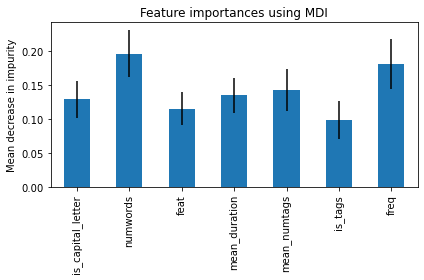

In [60]:
import pandas as pd

forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
#value of the best features for the channels that have buzzed
s_channels[s_channels['has_buzzed']==1][['is_capital_letter','numwords','feat','mean_duration','mean_numtags','is_tags','freq']].mean()



In [110]:
s_channels[s_channels['has_buzzed']==1][['is_capital_letter','numwords','feat','mean_duration','mean_numtags','is_tags','freq']].mean()

is_capital_letter      0.308629
numwords               9.598073
feat                   0.087870
mean_duration        749.191150
mean_numtags          14.729602
is_tags                0.784259
freq                   2.643893
dtype: float64

In [111]:
s_channels[s_channels['has_buzzed']==0][['is_capital_letter','numwords','feat','mean_duration','mean_numtags','is_tags','freq']].mean()

is_capital_letter      0.216633
numwords               7.869838
feat                   0.064833
mean_duration        613.456175
mean_numtags          13.630343
is_tags                0.835413
freq                   1.047774
dtype: float64

# Linear regression 

In [78]:
import statsmodels.formula.api as smf
model = smf.ols(formula='mean_duration ~ C(has_buzzed)', data=s_channels)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          mean_duration   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.947
Date:                Mon, 12 Dec 2022   Prob (F-statistic):             0.0863
Time:                        14:55:47   Log-Likelihood:                -10899.
No. Observations:                1258   AIC:                         2.180e+04
Df Residuals:                    1256   BIC:                         2.181e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            613.4562     55

# Most used tags 

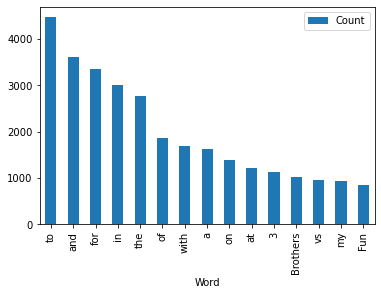

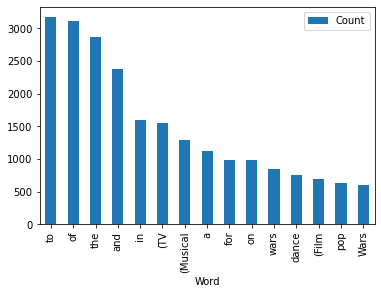

In [28]:
from collections import Counter
  
Buz_tags = buzzing_videos.groupby('channel')['tags'].agg(pd.Series.mode).values
Nbuz_tags = not_buzzing_videos.groupby('channel')['tags'].agg(pd.Series.mode).values
# split() returns list of all the words in the string
split_Buz = str(Buz_tags).split()
split_Nbuz = str(Nbuz_tags).split()
lst_buz = Counter(split_Buz).most_common(15)
lst_not_buz = Counter(split_Nbuz).most_common(15)
df_1 = pd.DataFrame(lst_buz, columns = ['Word', 'Count'])
df_2 = pd.DataFrame(lst_not_buz, columns = ['Word', 'Count'])
df_1.plot.bar(x='Word',y='Count')
df_2.plot.bar(x='Word',y='Count')
plt.show()

    

In [16]:
buzzing_channel = s_channels[s_channels['has_buzzed']==1]
not_buzzing_channel= s_channels[s_channels['has_buzzed']==0]

# Boxplot

<Figure size 720x504 with 0 Axes>

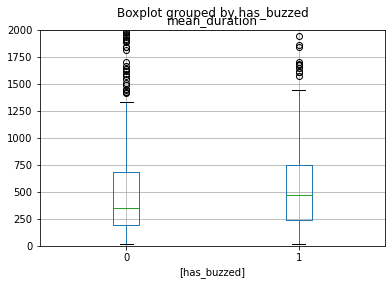

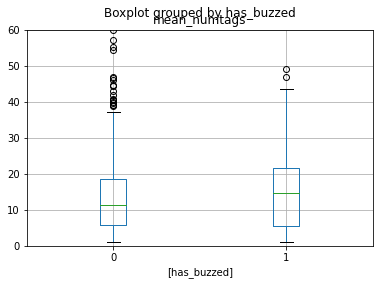

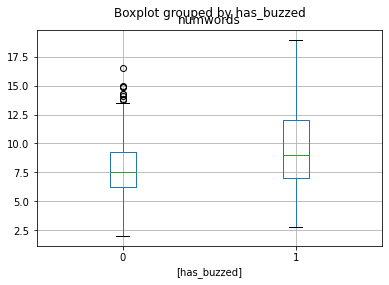

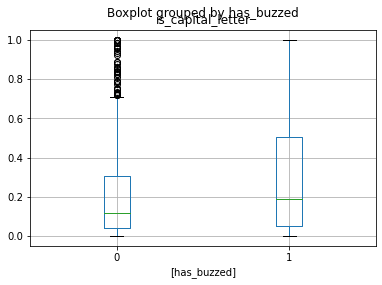

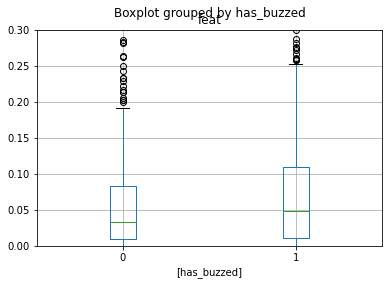

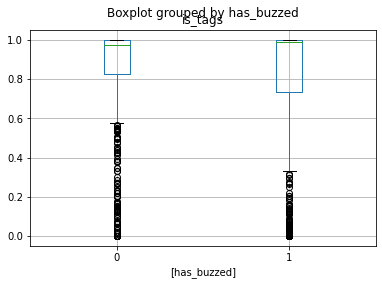

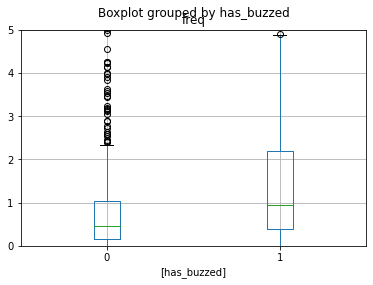

In [66]:
fig = plt.figure(figsize =(10, 7))

bp1 =s_channels.boxplot(column=['mean_duration'], by=['has_buzzed'])
plt.ylim([0,2000])
bp2 =s_channels.boxplot(column=['mean_numtags'], by=['has_buzzed'])
plt.ylim([0,60])
bp3 =s_channels.boxplot(column=['numwords'], by=['has_buzzed'])
bp4 =s_channels.boxplot(column=['is_capital_letter'], by=['has_buzzed'])
bp5 =s_channels.boxplot(column=['feat'], by=['has_buzzed'])

plt.ylim([0,0.3])
bp6 =s_channels.boxplot(column=['is_tags'], by=['has_buzzed'])
bp7 =s_channels.boxplot(column=['freq'], by=['has_buzzed'])
plt.ylim([0,5])
# show plot
plt.show()

# Lexical analysis on title 

In [11]:
s_metadata['has_buzzed']= pd.merge(s_metadata,s_channels[['channel','has_buzzed']],on='channel')['has_buzzed']
buzzing_videos = s_metadata[s_metadata['has_buzzed']==1]
not_buzzing_videos= s_metadata[s_metadata['has_buzzed']==0]

In [84]:
# Analysis of the lexical fields


from empath import Empath 
import operator
import plotly.graph_objects as go
import networkx as nx
from collections import Counter
from itertools import chain

lexicon = Empath()


def mean_lexical(title):
    # returns a 1 x nbr_lexical_fields dataframe associating a mean lexical field score for the whole provided quote corpus
    
    lexical_fields_dict = lexicon.analyze(title.str.cat(sep = ' '), normalize = True) #by default, analyze all lexical fields from Empath

    return lexical_fields_dict


categories_df = []
categories_df.append(mean_lexical(buzzing_videos['title']))
categories_df.append(mean_lexical(not_buzzing_videos['title']))
categories_df = pd.DataFrame(categories_df, index = ['Buzzing','Not Buzzing']) 


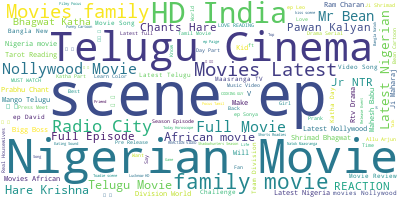

In [86]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(buzzing_videos['title'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

Topics with mean of each youtuber

In [116]:
#iterate on the channels
categories_buzzing = []
for i in buzzing_videos.channel.unique():
    categories_buzzing.append(mean_lexical(buzzing_videos['title'][buzzing_videos.channel==i]))
categories_buzzing = pd.DataFrame(categories_buzzing, index = buzzing_videos.channel.unique())
    
categories_not_buzzing = []
for i in not_buzzing_videos.channel.unique():
    categories_not_buzzing.append(mean_lexical(not_buzzing_videos['title'][not_buzzing_videos.channel==i]))
categories_not_buzzing = pd.DataFrame(categories_not_buzzing, index = not_buzzing_videos.channel.unique())
  
#mean_lexical(buzzing_videos['title'][buzzing_videos.channel=='UCztk4LFUIk4Ao4TCvpdnDsg'])

In [117]:
categories_buzzing = pd.DataFrame(categories_buzzing.mean())
categories_buzzing.columns = ['Buzzing']
categories_not_buzzing= pd.DataFrame(categories_not_buzzing.mean())
categories_not_buzzing.columns = ['Not Buzzing']

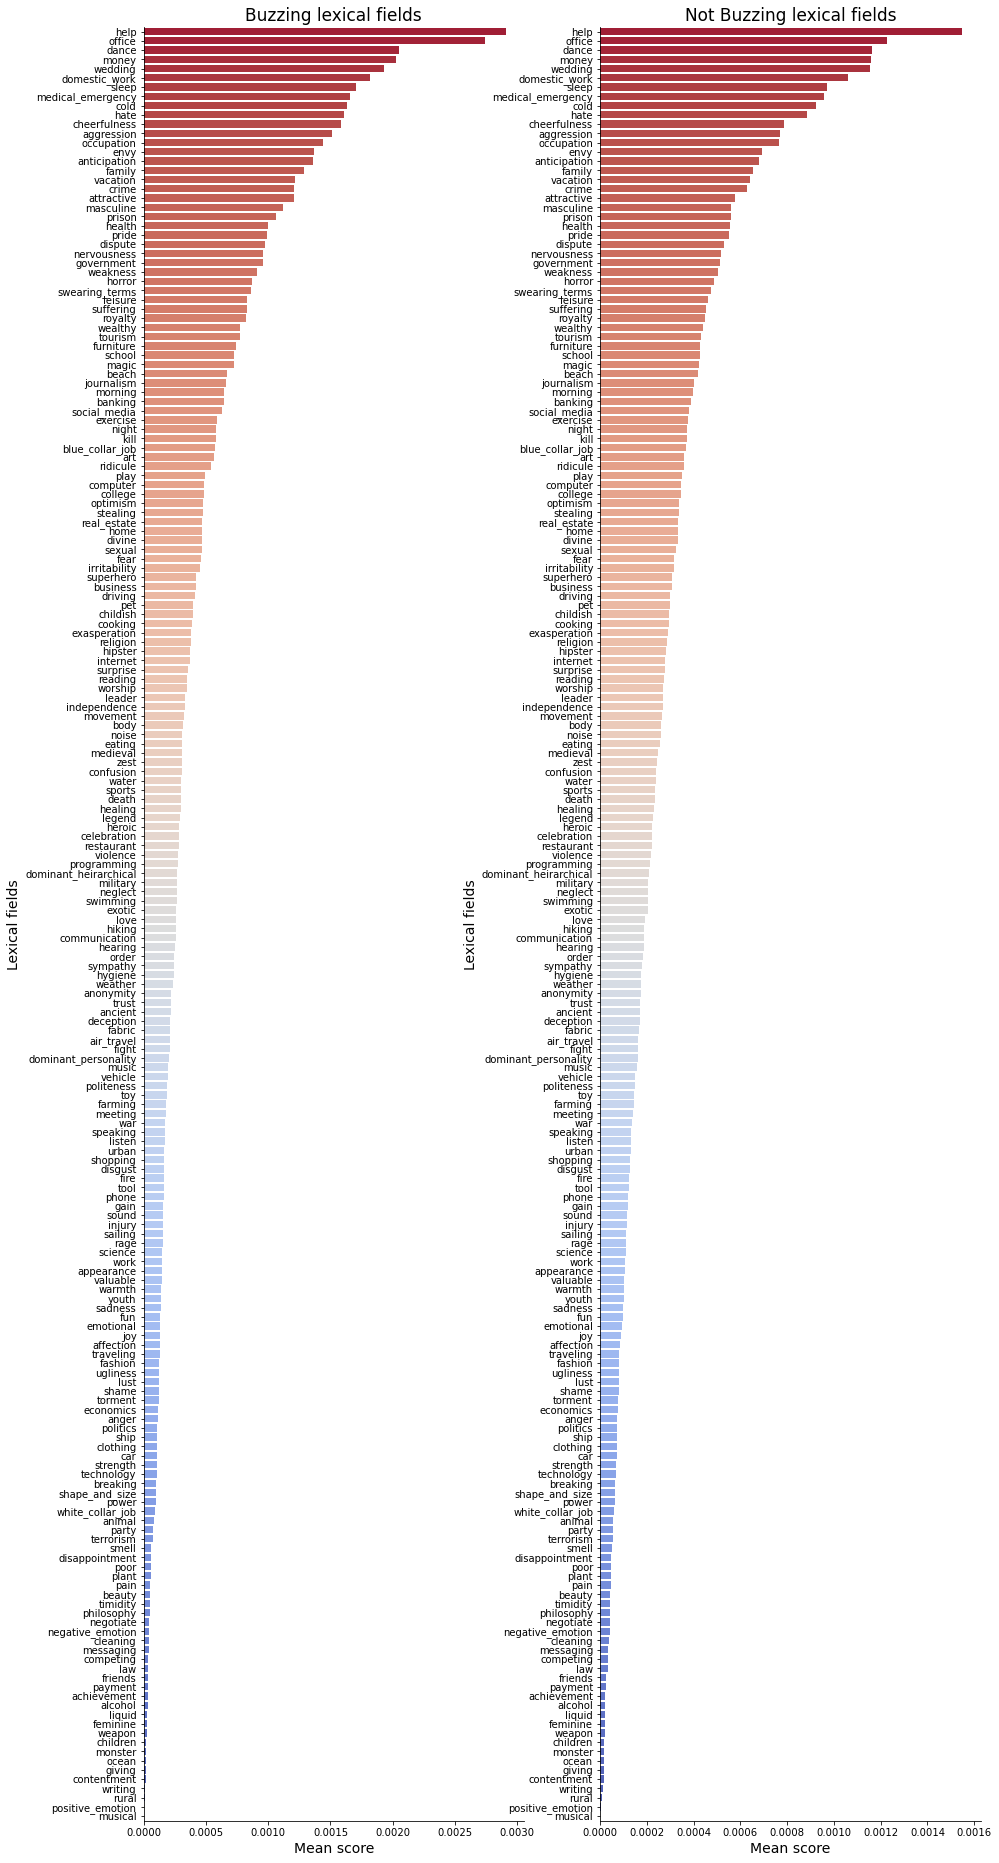

In [118]:
import seaborn as sns
#temp_df = categories.mean().copy().T 
#temp_df.reset_index(inplace=True)

fig, ax = plt.subplots(1,2, figsize=(15, 33))

palette = sns.color_palette("coolwarm", n_colors = len(categories_buzzing))
palette.reverse()

temp_df_1 = categories_buzzing.sort_values(by=['Buzzing'],  ascending=False)
sns.barplot(x = 'Buzzing', y = categories_buzzing.index, data=temp_df_1, ax = ax[0], palette = palette)
ax[0].set_title("Buzzing lexical fields", fontsize = 17)
ax[0].set_xlabel("Mean score", fontsize = 14)
ax[0].set_ylabel("Lexical fields", fontsize = 14)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

palette = sns.color_palette("coolwarm", n_colors = len(categories_not_buzzing))
palette.reverse()

temp_df_2 = categories_not_buzzing.sort_values(by=['Not Buzzing'],  ascending=False)
sns.barplot(x = 'Not Buzzing', y = categories_not_buzzing.index, data=temp_df_2, ax = ax[1], palette = palette)
ax[1].set_title("Not Buzzing lexical fields", fontsize = 17)
ax[1].set_xlabel("Mean score", fontsize = 14)
ax[1].set_ylabel("Lexical fields", fontsize = 14)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

In [ ]:
categories_df

,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,...,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical
Buzzing,0.000147,0.000268,0.001516,0.000153,0.001581,0.001211,0.000100,0.000102,0.000146,0.000122,...,0.000139,0.001723,0.000064,0.000124,0.000192,0.000115,0.000146,0.000262,0.001596,0.001294
Not Buzzing,0.000142,0.000411,0.001056,0.000206,0.000289,0.000215,0.000092,0.000142,0.000183,0.000117,...,0.000288,0.000560,0.000065,0.000179,0.000238,0.000046,0.000230,0.000200,0.000420,0.000690


Topics in general

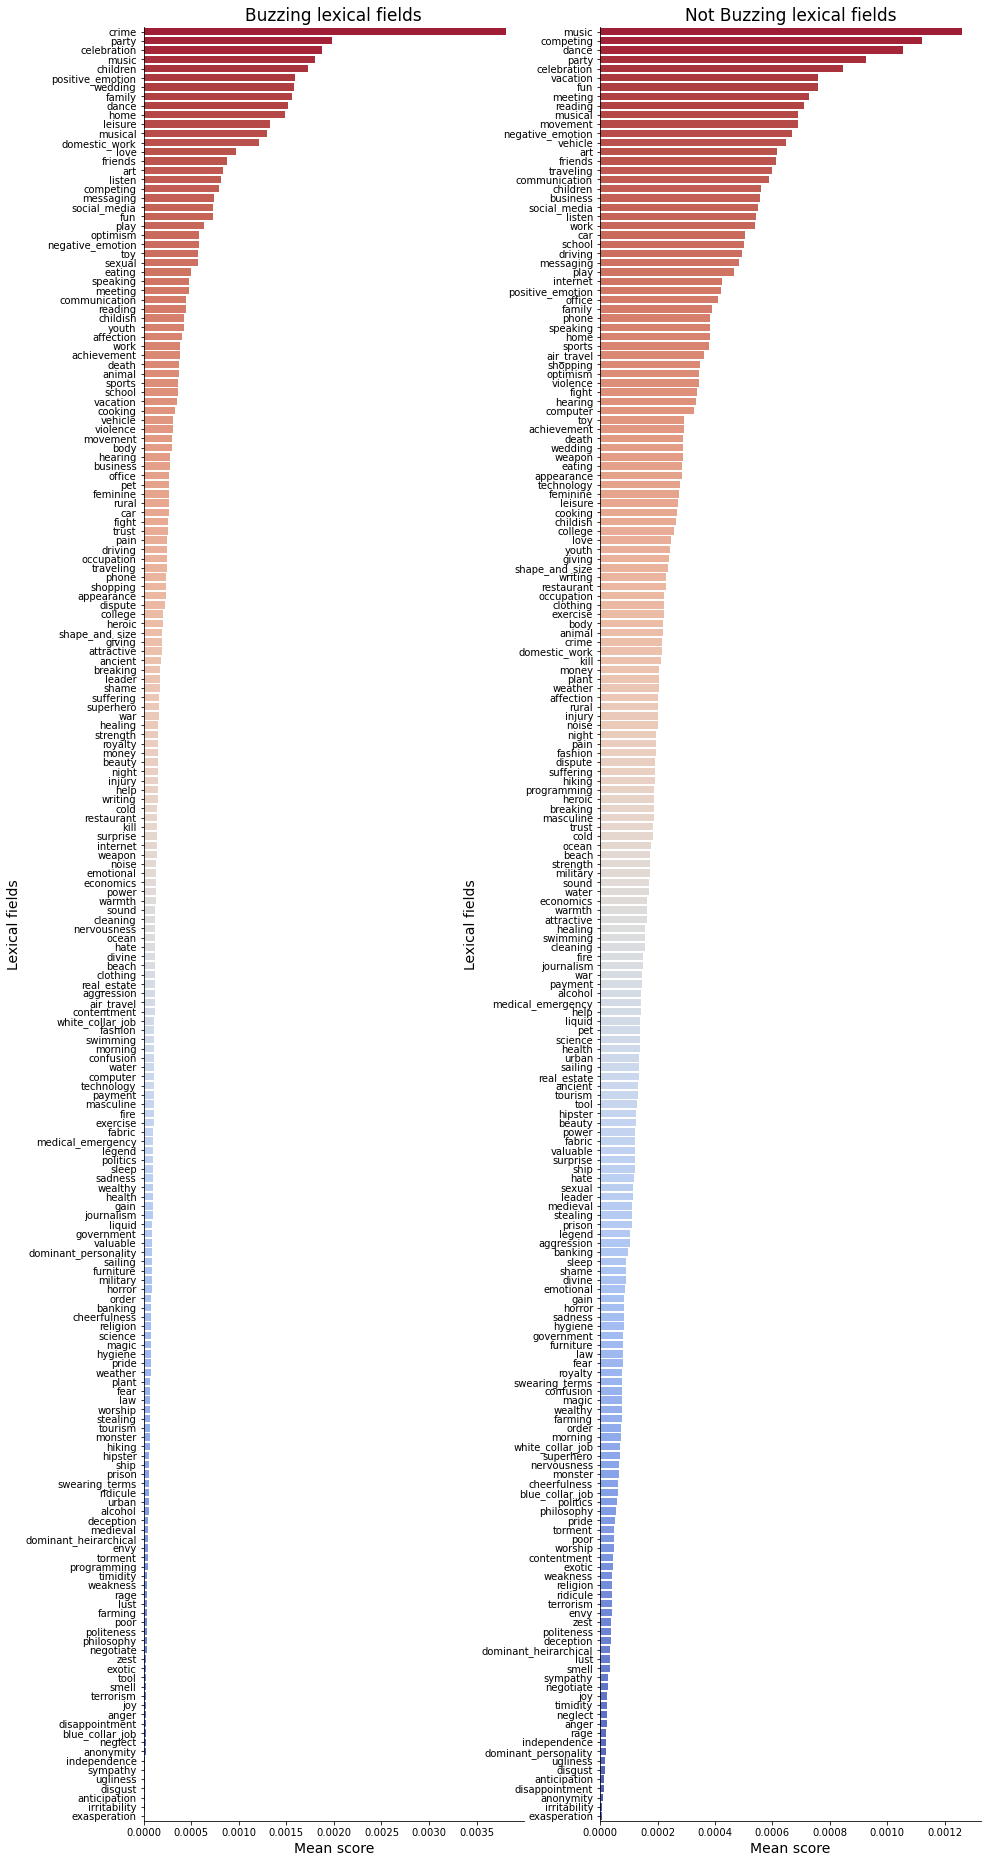

In [34]:
import seaborn as sns
temp_df = categories_df.copy().T 
temp_df.reset_index(inplace=True)

fig, ax = plt.subplots(1,2, figsize=(15, 33))

palette = sns.color_palette("coolwarm", n_colors = len(temp_df))
palette.reverse()

temp_df = temp_df.sort_values(by=['Buzzing'],  ascending=False)
sns.barplot(x = 'Buzzing', y = 'index', data=temp_df, ax = ax[0], palette = palette)
ax[0].set_title("Buzzing lexical fields", fontsize = 17)
ax[0].set_xlabel("Mean score", fontsize = 14)
ax[0].set_ylabel("Lexical fields", fontsize = 14)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

temp_df = temp_df.sort_values(by=['Not Buzzing'],  ascending=False)
sns.barplot(x = 'Not Buzzing', y = 'index', data=temp_df, ax = ax[1], palette = palette)
ax[1].set_title("Not Buzzing lexical fields", fontsize = 17)
ax[1].set_xlabel("Mean score", fontsize = 14)
ax[1].set_ylabel("Lexical fields", fontsize = 14)
ax[1].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

In [37]:
temp_df = categories_df.copy().T 
temp_df.reset_index(inplace=True)

#number of quotes to keep per category
N = 15

#we isolate the 15 most common lexical fields from our three categories:
temp_df = temp_df.sort_values(by=['Buzzing'],  ascending=False, ignore_index=True)
Buz_LFs = temp_df.loc[:N-1,'index'].values
temp_df = temp_df.sort_values(by=['Not Buzzing'],  ascending=False, ignore_index=True)
Nbuz_LFs = temp_df.loc[:N-1,'index'].values


#we remove dupplicates:
most_common_LFs = np.concatenate([Buz_LFs, Nbuz_LFs])
most_common_LFs = np.array(most_common_LFs).ravel()
most_common_LFs = np.unique(most_common_LFs)

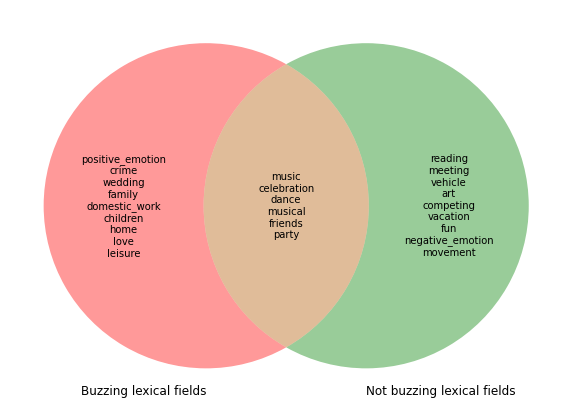

In [44]:
#Venn diagram
from matplotlib_venn import venn2
A = set(Buz_LFs)
B = set(Nbuz_LFs)

fig, ax = plt.subplots(1,1, figsize=(10, 10))

v = venn2([A, B], ('Buzzing lexical fields', "Not buzzing lexical fields"))

v.get_label_by_id('11').set_text('\n'.join(A&B))
v.get_label_by_id('10').set_text('\n'.join(A-B))
v.get_label_by_id('01').set_text('\n'.join(B-A))

# Sentiment analysis 

In [130]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()
text_1 = buzzing_videos['title'][buzzing_videos.channel=='UCztk4LFUIk4Ao4TCvpdnDsg']
text_2 =  "The pizza tastes terrible."
sent_1 = sentiment.polarity_scores(text_1)
sent_2 = sentiment.polarity_scores(text_2)
#transform sent_1 and sent_2 into a dataframe
sent_1 = pd.DataFrame.from_dict(sent_1, orient='index').T
sent_2 = pd.DataFrame.from_dict(sent_2, orient='index').T
sent_1

,neg,neu,pos,compound
0,0.022,0.978,0.0,-0.5775


In [133]:
sent_buzzing = []
for i in buzzing_videos.channel.unique():
    sent_1 = sentiment.polarity_scores(buzzing_videos['title'][buzzing_videos.channel==i])
    sent_buzzing.append(pd.DataFrame.from_dict(sent_1, orient='index').T)
sent_buzzing = pd.DataFrame(sent_buzzing, index = buzzing_videos.channel.unique())
    
sent_not_buzzing = []
for i in not_buzzing_videos.channel.unique():
    sent_2 = sentiment.polarity_scores(not_buzzing_videos['title'][not_buzzing_videos.channel==i])
    sent_not_buzzing.append(pd.DataFrame.from_dict(sent_2, orient='index').T)
sent_not_buzzing = pd.DataFrame(sent_not_buzzing, index = not_buzzing_videos.channel.unique())


In [132]:
sent_buzzing

[     neg    neu  pos  compound
 0  0.022  0.978  0.0   -0.5775,
      neg    neu    pos  compound
 0  0.181  0.739  0.081   -0.9823,
      neg   neu    pos  compound
 0  0.166  0.72  0.114   -0.9953,
      neg    neu    pos  compound
 0  0.084  0.843  0.073   -0.9391,
      neg    neu   pos  compound
 0  0.025  0.854  0.12    0.9991,
      neg    neu    pos  compound
 0  0.098  0.809  0.094    0.4406,
      neg    neu    pos  compound
 0  0.076  0.828  0.096    0.7601,
     neg    neu    pos  compound
 0  0.01  0.829  0.161    0.9999,
      neg    neu    pos  compound
 0  0.024  0.854  0.122    0.9959,
      neg    neu   pos  compound
 0  0.029  0.801  0.17    0.9584,
      neg    neu    pos  compound
 0  0.229  0.756  0.015   -0.9954,
    neg    neu    pos  compound
 0  0.0  0.982  0.018     0.586,
      neg    neu    pos  compound
 0  0.039  0.842  0.119    0.9972,
      neg    neu    pos  compound
 0  0.016  0.869  0.115       1.0,
      neg    neu    pos  compound
 0  0.076  0.696